In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

In [3]:
N = 10000
X = npr.normal(0,1, N)

sigma = 0.4
omega = stats.norm.pdf(X, 0, sigma) / stats.norm.pdf(X, 0, 1)
sum_omega = sum(omega)
omega = omega / sum_omega

def resample(Nk, title):
    Nk = Nk.astype(int)
    resampled = np.repeat(X, Nk)
    print(f"The Std dev of the sample is {np.std(resampled):.4f}.\nAs a reference, the pre-set sigma is {sigma:.4f}")
    print(f"The absolute error is {abs(np.std(resampled)-sigma):.2e}")
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.hist(resampled, bins=50, label="sampled")
    ax2 = ax1.twinx()  
    x01 = np.linspace(-2,2)
    ax2.plot(x01, stats.norm.pdf(x01, 0, sigma),'r', label="actrual")
    plt.title(title)
    plt.legend()
    plt.show()
    print(f"The Variance of N_k is {np.var(Nk):.2e}")
    # return np.var(Nk), np.std(resampled), abs(np.std(resampled-sigma))

The Std dev of the sample is 0.3997.
As a reference, the pre-set sigma is 0.4000
The absolute error is 3.05e-04


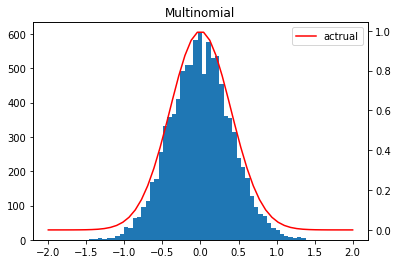

The Variance of N_k is 1.84e+00


In [4]:
Nk = npr.multinomial(N, omega)
resample(Nk, "Multinomial")

The Std dev of the sample is 0.4026.
As a reference, the pre-set sigma is 0.4000
The absolute error is 2.62e-03


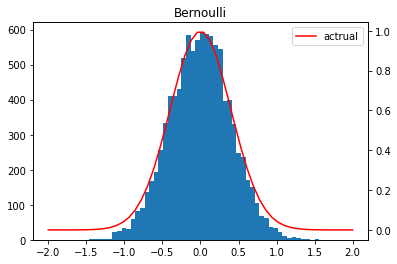

The Variance of N_k is 9.78e-01


In [5]:
expected = N * omega
decimal, integer = np.modf(expected)
U = npr.uniform(size=N)
Nk = integer + (U < decimal)
resample(Nk, "Bernoulli")

The Std dev of the sample is 0.4007.
As a reference, the pre-set sigma is 0.4000
The absolute error is 7.34e-04


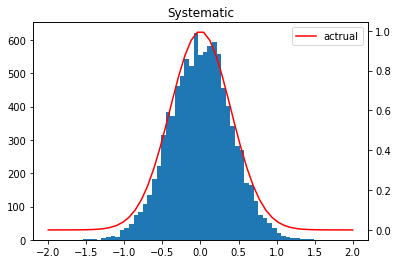

The Variance of N_k is 1.06e+00


In [6]:
Un = npr.uniform(size=N)
j = np.arange(1,N+1)
Unj = (j-Un)/N
bounds = np.cumsum(omega)
bounds = np.concatenate(([-np.inf], bounds, [np.inf]))
       
def _count_range(jj):
    return np.sum((bounds[jj-1] < Unj) & (Unj < bounds[jj]))
count_range = np.vectorize(_count_range)

Nk = count_range(j)
resample(Nk, "Systematic")

In [9]:
def get_Nk(methods, nomg): # methods = 1,2,3

    if methods == 1:
        Nk = npr.multinomial(N, nomg)

    elif methods == 2:
        expected = N * nomg
        decimal, integer = np.modf(expected)
        U = npr.uniform(size=N)
        Nk = integer + (U < decimal)

    elif methods == 3:
        Un = npr.uniform(size=N)
        j = np.arange(1,N+1)
        Unj = (j-Un)/N
        bounds = np.cumsum(nomg)
        bounds = np.concatenate(([-np.inf], bounds, [np.inf]))
        Nk = np.zeros(N)

        def _count_range(jj):
            return np.sum((bounds[jj-1] < Unj) & (Unj < bounds[jj]))
        count_range = np.vectorize(_count_range)

        Nk = count_range(j)
    
    Nk = Nk.astype(int)
    return Nk

In [10]:
def _change_sigma(sig, met):
    omg = stats.norm.pdf(X, 0, sig) / stats.norm.pdf(X, 0, 1)
    sum_omg = sum(omg)
    nomg = omg / sum_omg
    Nk = get_Nk(met, nomg)
    return np.var(Nk)
    resampled = np.repeat(X, Nk)
    return np.array([abs(sig - np.std(resampled))])

In [11]:
N = 1000
X = npr.normal(0,1, N)
res = np.zeros((20,4))
for i in np.arange(20):
    sigg = 0.1 * (i+1)
    res[i,0] = sigg
    res[i,1] = _change_sigma(sigg, 1)
    res[i,2] = _change_sigma(sigg, 2)
    res[i,3] = _change_sigma(sigg, 3)

In [12]:
res

array([[0.1     , 7.234   , 6.160991, 6.138   ],
       [0.2     , 3.462   , 2.709996, 2.786   ],
       [0.3     , 2.608   , 1.609216, 1.658   ],
       [0.4     , 2.024   , 0.987964, 1.086   ],
       [0.5     , 1.546   , 0.666991, 0.826   ],
       [0.6     , 1.304   , 0.504639, 0.624   ],
       [0.7     , 1.282   , 0.348   , 0.504   ],
       [0.8     , 1.082   , 0.234999, 0.436   ],
       [0.9     , 1.046   , 0.105996, 0.304   ],
       [1.      , 1.03    , 0.      , 0.      ],
       [1.1     , 0.988   , 0.118775, 0.386   ],
       [1.2     , 1.072   , 0.216999, 0.47    ],
       [1.3     , 1.25    , 0.362951, 0.58    ],
       [1.4     , 1.224   , 0.614639, 0.804   ],
       [1.5     , 1.518   , 0.950919, 1.082   ],
       [1.6     , 2.346   , 1.329744, 1.446   ],
       [1.7     , 2.402   , 1.747856, 1.902   ],
       [1.8     , 3.672   , 2.255984, 2.254   ],
       [1.9     , 3.158   , 2.782471, 2.82    ],
       [2.      , 4.456   , 3.351676, 3.298   ]])

The codes below generates the table in latex:

In [15]:
print("$\\sigma$ & Multinomial & Bernoulli & Systematic\\\\")
for line in res:
    print("{:.1f} & {:.4f} & {:.4f} & {:.4f} \\\\".format(*line))

$\sigma$ & Multinomial & Bernoulli & Systematic\\
0.1 & 7.2340 & 6.1610 & 6.1380 \\
0.2 & 3.4620 & 2.7100 & 2.7860 \\
0.3 & 2.6080 & 1.6092 & 1.6580 \\
0.4 & 2.0240 & 0.9880 & 1.0860 \\
0.5 & 1.5460 & 0.6670 & 0.8260 \\
0.6 & 1.3040 & 0.5046 & 0.6240 \\
0.7 & 1.2820 & 0.3480 & 0.5040 \\
0.8 & 1.0820 & 0.2350 & 0.4360 \\
0.9 & 1.0460 & 0.1060 & 0.3040 \\
1.0 & 1.0300 & 0.0000 & 0.0000 \\
1.1 & 0.9880 & 0.1188 & 0.3860 \\
1.2 & 1.0720 & 0.2170 & 0.4700 \\
1.3 & 1.2500 & 0.3630 & 0.5800 \\
1.4 & 1.2240 & 0.6146 & 0.8040 \\
1.5 & 1.5180 & 0.9509 & 1.0820 \\
1.6 & 2.3460 & 1.3297 & 1.4460 \\
1.7 & 2.4020 & 1.7479 & 1.9020 \\
1.8 & 3.6720 & 2.2560 & 2.2540 \\
1.9 & 3.1580 & 2.7825 & 2.8200 \\
2.0 & 4.4560 & 3.3517 & 3.2980 \\
